# 🕓 Симуляция времени чтения RFID метки

In [1]:
from pysim.experiments.utility.rfid_helper import *
from pysim.models.rfid.params import default_params

In [2]:
IMG_DIRECTORY = "rfid/simulation_time/"
JSON_DIRECTORY = "../results/result_jsons/rfid/simulation_time/"

## Время чтения метки в случае без коллизий

In [6]:
# Переменная по оси абсцисс
altitudes = np.arange(1, 7.5, 0.5)
# altitudes = (2,3)
# Параметры для разных кривых
offset_params = [
    {"reader_offset": 1},
    # {"reader_offset": 2},
    # {"reader_offset": 3},
]

# Каждый словарь в list - это набор входных данных для одной кривой
altitude_params_list = []
for offset_params_item in offset_params:
    altitude_params_list.append({
        "tari": default_params.tari,
        "encoding": default_params.encoding,
        "tid_word_size": default_params.tid_word_size,
        "power": default_params.power_dbm,
        "num_tags": 250, # default_params.num_tags,
        "speed": default_params.speed,
        "reader_offset": offset_params_item["reader_offset"],
        "tag_offset": default_params.tag_offset,
        "useadjust": default_params.useadjust,
        "generation_interval": (generation_interval, 1),
        "q": 0 # default_params.q,
    })

In [7]:
key_name = lambda params: f"Расстояние от стены = {params["reader_offset"]} м"

altitude_results = calculate_simulations(
    variable="altitude",
    variable_values=altitudes,
    params_list=altitude_params_list,
    key_fn=key_name,
    use_json=False,
    save_results=False,
    json_directory=JSON_DIRECTORY,
    file_name="altitude_times.json"
)

Моделирование по переменной altitude: 100%|██████████| 1/1 [00:29<00:00, 29.26s/it]


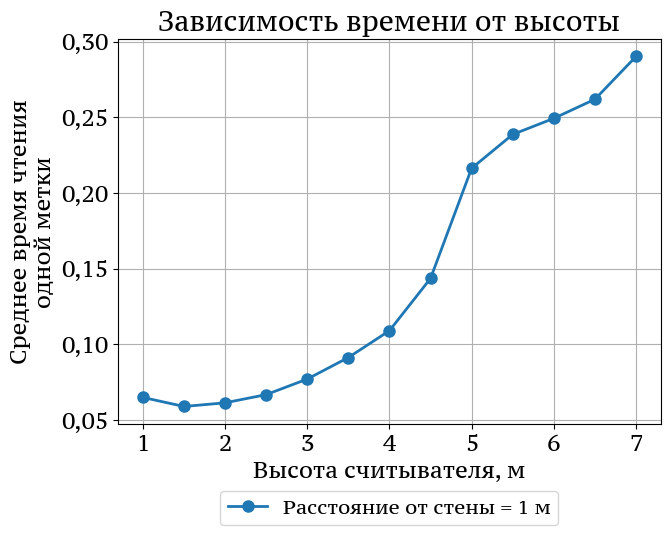

In [8]:
plot_simulations_results(
    results_list=[altitude_results["times_count"]],
    labels_list=[key_name(params) for params in offset_params],
    titles=["Зависимость времени от высоты"],
    x_variable=altitudes,
    x_label="Высота считывателя, м",
    y_label="Среднее время чтения\nодной метки",
    image_name="Altitude times",
    save_fig=False,
    image_directory=IMG_DIRECTORY,
)

## Время чтения метки в случае с коллизиями

In [6]:
TAGS_IN_READING_ZONE = (1, 5, 15, 25)

tag_intervals = [
    estimate_generation_interval(tags_amount, compute_reading_zone())
    for tags_amount in TAGS_IN_READING_ZONE
]
tag_period_params = [
    {"label": f"{n} меток", "generation_interval": (generation_interval, t)}
    for n, t in zip(TAGS_IN_READING_ZONE, tag_intervals)
]

### Зависимость времени чтения метки от высоты полёта БПЛА

In [7]:
# Переменная по оси абсцисс
altitudes = np.arange(1, 6, 0.5)

# Каждый словарь в list - это набор входных данных для одной кривой
altitude_params_list = []
for tag_params_item in tag_period_params:
    altitude_params_list.append({
        "tari": default_params.tari,
        "encoding": default_params.encoding,
        "tid_word_size": default_params.tid_word_size,
        "power": default_params.power_dbm,
        "num_tags": 1000,
        "speed": default_params.speed,
        "reader_offset": default_params.reader_offset,
        "tag_offset": default_params.tag_offset,
        "useadjust": default_params.useadjust,
        "generation_interval": tag_params_item["generation_interval"],
        "label": tag_params_item["label"],
        "q": default_params.q,
    })

In [8]:
key_name = lambda params: f"{params["label"]}"

collision_altitude_results = calculate_simulations(
    variable="altitude",
    variable_values=altitudes,
    params_list=altitude_params_list,
    key_fn=key_name,
    use_json=True,
    save_results=True,
    json_directory=JSON_DIRECTORY,
    file_name="altitude_times_collisions.json"
)

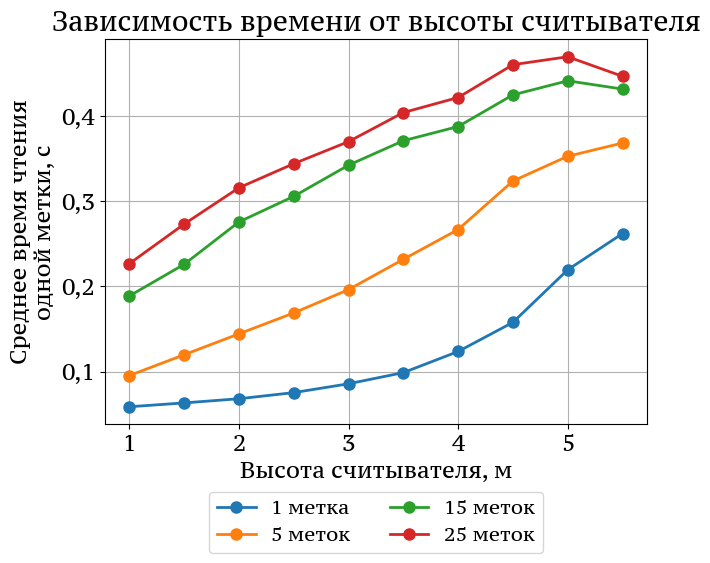

In [13]:
plot_simulations_results(
    results_list=[collision_altitude_results["times_count"]],
    labels_list=["1 метка", "5 меток", "15 меток", "25 меток"],
    titles=["Зависимость времени от высоты считывателя"],
    x_variable=altitudes,
    x_label="Высота считывателя, м",
    y_label="Среднее время чтения\nодной метки, c",
    image_name="Altitude times collisions",
    save_fig=True,
    image_directory=IMG_DIRECTORY,
)

### 📈 Зависимость времени чтения банка памяти `USER` от его величины (в байтах)

In [10]:
tid_lengths = list(range(16, 257, 16))

# Для первой серии экспериментов ------------------------------------

# Каждый словарь в list - это набор входных данных для одной кривой
length_params_list_1_exp = []
for tag_params_item in tag_period_params:
    length_params_list_1_exp.append({
        'tari': default_params.tari,
        'encoding': default_params.encoding,
        "power": default_params.power_dbm,
        'num_tags': 6000, # default_params.num_tags,
        'speed': default_params.speed,
        'reader_offset': default_params.reader_offset,
        'tag_offset': default_params.tag_offset,
        'altitude': default_params.altitude,
        'useadjust': default_params.useadjust,
        "generation_interval": tag_params_item["generation_interval"],
        "label": tag_params_item["label"],
        'q': default_params.q,
    })

In [11]:
collision_length_results = calculate_simulations(
    variable="tid_word_size",
    variable_values=tid_lengths,
    params_list=length_params_list_1_exp,
    key_fn=key_name,
    use_json=True,
    save_results=False,
    json_directory=JSON_DIRECTORY,
    file_name="length_times_collisions.json"
)

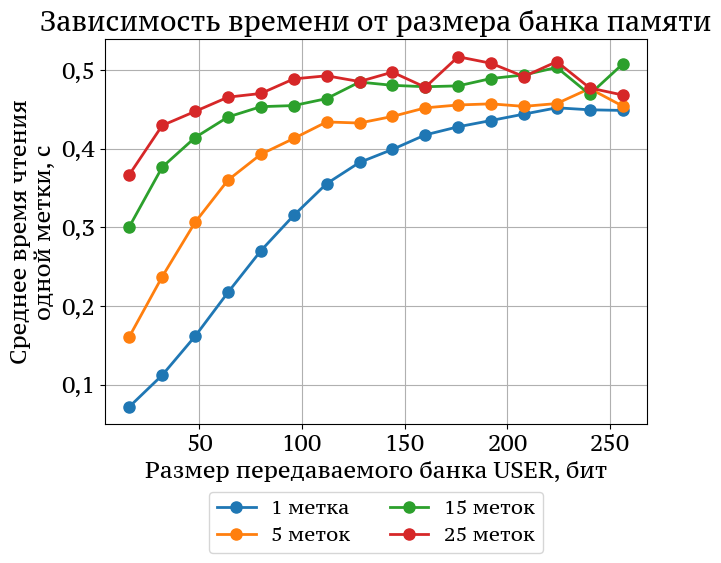

In [12]:
plot_simulations_results(
    results_list=[collision_length_results["times_count"]],
    labels_list=["1 метка", "5 меток", "15 меток", "25 меток"],
    titles=["Зависимость времени от размера банка памяти"],
    x_variable=tid_lengths,
    x_label="Размер передаваемого банка USER, бит",
    y_label="Среднее время чтения\nодной метки, c",
    image_name="Length probs",
    save_fig=True,
    image_directory=IMG_DIRECTORY,
)